# Introdução à Recuperação de Informações

## Lista de exercícios 2

Todos os exercícios requerem uma implementação funcional do problema, no corpo do notebook. Para cada exercício consultas de teste devem ser propostas para demonstrar que a implementação atende aos requisitos do exercício.
As resposta devem ser enviadas como um notebook (.ipynb) para o professor.

## Exercício 1: Similaridade por Cosseno.

Com base na metodologia apresentada na Prática 2, usando o corpus de Machado, Construa vetorizações, binárias, por frequência e por tf-idf. Compare a ordenação dos resultados para uma consulta qualquer, com pelo menos 3 palavras. Para a ordenação dos resultados, use o cosseno entre os vetores da consulta e dos documentos.

In [1]:
from nltk.corpus import machado
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import string

from collections import defaultdict, Counter, OrderedDict
from nltk.stem.snowball import PortugueseStemmer
import nltk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
textos = [machado.raw(id) for id in machado.fileids()]
tok_textos = [WordPunctTokenizer().tokenize(t.lower()) for t in textos]
vocab = set([])
for t in tok_textos:
    vocab = vocab.union(set(t))

In [3]:
T = nltk.TextCollection(tok_textos)

In [4]:
q = "Lamartine elixir harpa"
qt = WordPunctTokenizer().tokenize(q.lower())

Construindo as matrizes:

In [11]:
binary_matrix = np.empty((len(tok_textos),len(qt)))
for j,w in enumerate(qt):
    for i, d in enumerate(tok_textos):
        if w in d:
            binary_matrix[i,j] = 1
        else:
            binary_matrix[i,j] = 0

In [31]:
freq_matrix = np.empty((len(tok_textos), len(qt)))
for j,w in enumerate(qt):
    for i,d in enumerate(tok_textos):
        freq_matrix[i,j] = d.count(w)   

In [12]:
tfidf_matrix = np.empty((len(tok_textos),len(qt)))
for j,w in enumerate(qt):
    for i, d in enumerate(tok_textos):
        tfidf_matrix[i,j] = T.tf_idf(w,d)

Comparando a ordenação:

1 - Busca binária: coeficiente de Jaccard

In [83]:
jaccard = dict()
for i, d in enumerate(tok_textos):
    intersec = len(set(qt) & set(d))
    if intersec != 0:
        jaccard[i] = intersec/len(set(qt) | set(d))
sorted_jaccard = OrderedDict(sorted(jaccard.items(), key=lambda x: x[1], reverse = True))

In [84]:
print(sorted_jaccard.keys())

odict_keys([176, 147, 152, 194, 125, 80, 138, 186, 32, 240, 238, 16, 85, 217, 0, 41, 222, 216, 165, 4, 185, 218, 184, 139, 232, 229, 193])


2 - Busca por frequência : ponderação pelo log da frequência

In [76]:
tf_dic = dict()
for i in range(len(freq_matrix)):
    tf = 0
    for j in range(len(qt)):
        if freq_matrix[i,j] != 0:
            tf = tf + 1 + np.log10(freq_matrix[i,j])
    if tf != 0:
        tf_dic[i] = tf
sorted_tf = OrderedDict(sorted(tf_dic.items(), key=lambda x: x[1], reverse = True))

In [77]:
print(sorted_tf.keys())

odict_keys([185, 193, 0, 222, 217, 4, 41, 85, 125, 216, 16, 32, 80, 138, 139, 147, 152, 165, 176, 184, 186, 194, 218, 229, 232, 238, 240])


3 - Ordenação por tf-idf

In [80]:
from numpy.linalg import norm
MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tfidf_matrix])
def ordem(q):
    return [np.dot(q,r) for r in MN]
# calculando o tf-idf dos termos na consulta, considerando q um documento da Coleção...
# O que equivale a vetorizar a consulta.
qv = np.array([T.tf_idf(w,qt) for w in qt])
qv /= norm(qv)
r = ordem(qv)
tfidf = dict(filter(lambda x : x[1]!= 0.0, zip(range(len(tok_textos)), r)))

sorted_tfidf = OrderedDict(sorted(tfidf.items(), key=lambda x: x[1], reverse = True))

In [81]:
print(sorted_tfidf.keys())

odict_keys([185, 0, 4, 217, 193, 32, 41, 85, 138, 229, 238, 222, 16, 125, 152, 176, 194, 232, 80, 139, 147, 165, 184, 186, 216, 218, 240])


Podemos ver que a ordenação por tf e por tf-idf estão bem mais próximas do que a ordenação por coeficiente de jaccard. Vamos dar uma olhada nas ocorrências das plavras nos textos 185 (1 colocado na ordenação por tf e por tf-idf, e 21 por jaccard), no texto 0 (2 colocado por tf-idf; 3 por tf; 15 por jaccard) e no texto 176 (1 por jaccard, 16 por tf-idf e 19 por tf).

In [85]:
for key in sorted_tfidf.keys(): 
    fd=nltk.FreqDist(WordPunctTokenizer().tokenize(textos[key].lower()))
    print("Ocorrências dos termos de busca no texto {}: ".format(key),fd['lamartine'],fd['elixir'],fd['harpa'])

Ocorrências dos termos de busca no texto 185:  4 3 2
Ocorrências dos termos de busca no texto 0:  1 2 1
Ocorrências dos termos de busca no texto 4:  1 0 1
Ocorrências dos termos de busca no texto 217:  2 0 1
Ocorrências dos termos de busca no texto 193:  11 2 0
Ocorrências dos termos de busca no texto 32:  0 1 0
Ocorrências dos termos de busca no texto 41:  0 10 0
Ocorrências dos termos de busca no texto 85:  0 9 0
Ocorrências dos termos de busca no texto 138:  0 1 0
Ocorrências dos termos de busca no texto 229:  0 1 0
Ocorrências dos termos de busca no texto 238:  0 1 0
Ocorrências dos termos de busca no texto 222:  1 0 7
Ocorrências dos termos de busca no texto 16:  1 0 0
Ocorrências dos termos de busca no texto 125:  2 0 0
Ocorrências dos termos de busca no texto 152:  1 0 0
Ocorrências dos termos de busca no texto 176:  1 0 0
Ocorrências dos termos de busca no texto 194:  1 0 0
Ocorrências dos termos de busca no texto 232:  1 0 0
Ocorrências dos termos de busca no texto 80:  0 0 1


Vemos que de fato o texto 185 é o que tem maior ocorrência das palavras, e contém todos os termos da busca. O texto 0 também contém todos os termos, mas em frequência menor. Já o texto 176 contém apenas um termo. Seu coeficiente de jaccard deve ser pequeno devido ao tamanho do documento:

In [100]:
dic = {}
for i, j in enumerate(tok_textos):
    dic[i] = len(j)
dic = {k: dic[k] for k in sorted_tfidf.keys() & dic.keys()}
dic = OrderedDict(sorted(dic.items(), key=lambda x: x[1]))

In [101]:
print(dic)

OrderedDict([(176, 1051), (147, 1856), (152, 2306), (194, 3232), (186, 4402), (125, 4403), (138, 4590), (80, 4679), (32, 6093), (238, 7789), (85, 9438), (240, 9596), (16, 10052), (41, 10720), (216, 15704), (165, 17034), (218, 21568), (217, 21844), (184, 22939), (222, 29257), (139, 29569), (4, 55914), (232, 61921), (0, 69523), (185, 92468), (229, 97797), (193, 324384)])


E, como suspeitávamos, o texto 176 é o que contém menos palavras daqueles que contém algum termo de busca, o que fez o coeficiente de jaccard ser mais alto.

### Exercício 2: Explorando o conceito de similaridade

Construa uma matriz de similaridade (cossenos entre vetores de frequência) entre todos os textos de machado. 
Construa um histograma com os valores de similaridade, excluindo os 0s e 1s. Interprete.

Observação: abaixo está a minha tentativa de construir a matriz de similaridade, mas estava demorando muito tempo para rodar. Sendo assim, interrompi o processo e me baseei no código do Hugo para fazer o cálculo:

Arrumando o código acima para fazermos a matriz de similaridade:

In [20]:
def create_tfidf_matrix(text):    
    tfidf_matrix = np.empty((len(tok_textos),len(text)))
    for j,w in enumerate(text):
        for i, d in enumerate(tok_textos):
            tfidf_matrix[i,j] = T.tf_idf(w,d)
    return(tfidf_matrix)

In [103]:
def cosine_dif(tfidf_matrix):
    MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tfidf_matrix])
    qv = np.array([T.tf_idf(w,qt) for w in qt])
    qv /= norm(qv)
    r = ordem(qv)
    return(r)

In [105]:
def dic_similarity_matrix():
    columns = {}
    for i, d in enumerate(tok_textos):
        tfidf_matrix = create_tfidf_matrix(d)
        columns[i] = cosine_dif(tfidf_matrix)
    return(columns)

In [ ]:
#dic_sim = dic_similarity_matrix()
# Muito tempo para rodar!!

Código do Hugo:

In [5]:
def get_vocab_tf(T):
    global vocab_tf
    vocab_tf = defaultdict(lambda:defaultdict(int))
    vocab_df = defaultdict(set)
    for tid,t in enumerate(T._texts):
            len_t = len(t)
            for w in t:
                vocab_tf[w][tid] += 1 / len_t
                vocab_df[w].add(tid)
    num_texts = len(T._texts)
    for w in vocab_df.keys():
        idf = (log(num_texts / len(vocab_df[w])) if bool(vocab_df[w]) else 0.0)
        T._idf_cache[w] = idf 

def get_vocab_tfidf(T):
    global vocab_tfidf
    try:
        assert vocab_tfidf is not (None)
    except:
        get_vocab_tf(T)
        num_texts = len(T._texts)
        vocab_tfidf = defaultdict(lambda:defaultdict(int))
        for w in vocab_tf.keys():
            for tid in range(num_texts):
                vocab_tfidf[w][tid] = vocab_tf[w][tid] * T.idf(w) 
            
def get_queryT_matrix(q_token, T, search_type="tf-idf", q_vec=False): 
    # Função apenas para auxiliar as condicionais que podem ocorrer na chamada da get_queryT_matrix
    def get_fun(search_type, q_vec): 
        if q_vec:
            tok_textos = [q_token]        
            if search_type=="tf-idf": 
                matrix_f = lambda w,d: T.tf_idf(w,d)
            elif search_type=="tf":   
                matrix_f = lambda w,d: T.tf(w,d)
            elif search_type=="bin": 
                matrix_f = lambda w,d: 1 if T.tf_idf(w,d) > 0 else 0
            else:
                raise Exception(f"search type {search_type} not avaiable, please choose between: tf-idf, tf, bin")    
        else:
            get_vocab_tfidf(T)
            tok_textos = T._texts
            if search_type=="tf-idf": 
                matrix_f = lambda w,d: vocab_tfidf[w][i] 
            elif search_type=="tf":   
                matrix_f = lambda w,d: vocab_tf[w][i]
            elif search_type=="bin":  
                matrix_f = lambda w,d: 1 if vocab_tf[w][i] > 0 else 0
            else:
                raise Exception(f"search type {search_type} not avaiable, please choose between: tf-idf, tf, bin") 
        return tok_textos, matrix_f

    tok_textos, matrix_f = get_fun(search_type, q_vec)        
    queryT_matrix = np.empty((len(tok_textos),len(q_token)))
    if not(q_vec):
        for j,w in enumerate(q_token):
            for i,d in enumerate(tok_textos):
                queryT_matrix[i,j] = matrix_f(w,i)
    else:
        for j,w in enumerate(q_token):
            for i,d in enumerate(tok_textos):
                queryT_matrix[i,j] = matrix_f(w,d)
    return queryT_matrix

def sim_cos(q_token, T, search_type="tf-idf", queryT_matrix=None):
    '''
    INPUT:  q_token -> texto tokenizado
            T -> Text Collection
    
    OUTPUT: list[cos] -> cosseno entre q_token e cada texto de T
    '''
    # MN: Normalized tf-idf matrix
    if queryT_matrix==None:
        queryT_matrix = get_queryT_matrix(q_token, T, search_type)    
    MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in queryT_matrix])
    # calculando o tf-idf dos termos na consulta, considerando q um documento da Coleção...
    # O que equivale a vetorizar a consulta.
    q_vec = get_queryT_matrix(q_token, T, search_type, q_vec=True)[0]
    q_norm = q_vec / norm(q_vec)
    return [np.dot(q_norm,r) for r in MN]

In [6]:
def get_vocab_tfidf_matrix(vocab, T):
    global vocab_tfidf_matrix
    try:
        assert vocab_tfidf_matrix is not(None)
    except NameError:
        vocab_tfidf_matrix = get_queryT_matrix(vocab, T)     

In [7]:
def sim_textos(T, vocab=vocab):
    get_vocab_tfidf_matrix(vocab, T)
    tok_textos = T._texts
    sim_matrix = np.empty((len(tok_textos),len(tok_textos))) 
    MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in vocab_tfidf_matrix])
    for tid, t in enumerate(tok_textos):
        q_norm = MN[tid]
        sim_matrix[tid] = np.array([np.dot(q_norm,r) for r in MN])
    return(sim_matrix)

In [8]:
sim_machado = sim_textos(T, vocab=vocab)

/home/bprallon/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


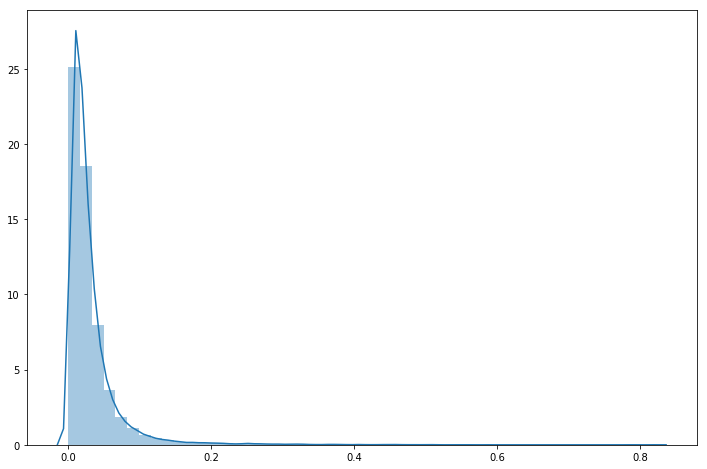

In [9]:
import seaborn as sns
hist_data = []
for sim in sim_machado[np.triu_indices_from(sim_machado)]:
    if not(np.isclose(sim, 1) | np.isclose(sim, 0)):
        hist_data.append(sim)
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.distplot(hist_data)

### Exercício 3: Usando o Gensim
Instale o Gensim, se ainda não o tiver. Seguindo o início deste tutorial: https://radimrehurek.com/gensim/tut2.html, construa um corpus usando as classes do Gensim, mas com os textos de Machado.

Usando o código desenolvido em aula:

In [12]:
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from nltk.stem.snowball import PortugueseStemmer
from collections import Counter
from string import punctuation

In [13]:
sw = stopwords.words('portuguese')+ list(punctuation)
stemmer = PortugueseStemmer()
textos_limpos = []
c = Counter([])
for texto in textos:
    tlimpo = [stemmer.stem(token.strip(punctuation).lower()) for token in WordPunctTokenizer().tokenize(texto) if token not in sw]
    c.update(tlimpo)
    textos_limpos.append(tlimpo)
textos_limpos = [[token for token in t if c[token]>1] for t in textos_limpos]
dicionario = corpora.Dictionary(textos_limpos)
dicionario.save('vocabulario.dict')
corpus = [dicionario.doc2bow(d) for d in textos_limpos]
corpora.MmCorpus.serialize('machado.mm', corpus)

### Exercício 4: Indexação Semântica Latente.

Ainda seguindo  o tutorial citado no exercício anterior, ajuste um modelo LSI para os documentos de machado. Interprete os resultados.

In [16]:
### Exercício 4: Indexação Semântica Latente.

lsi = models.LsiModel(corpus, id2word=dicionario, num_topics=4)
index = similarities.MatrixSimilarity(lsi[corpus]) 
def query_to_lsi(query):
    qt = [stemmer.stem(t) for t in WordPunctTokenizer().tokenize(query.lower())]
    vec_bow = dicionario.doc2bow(qt)
    vec_lsi = lsi[vec_bow] # convert the query to LSI space 
    return(vec_lsi)
sims = index[query_to_lsi("Lamartine elixir harpa")] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])

/home/bprallon/.local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [18]:
print(sims)

[(199, 0.8535798), (169, 0.8493401), (203, 0.816259), (173, 0.7970071), (166, 0.78722936), (167, 0.7862013), (142, 0.78471553), (161, 0.7777362), (157, 0.7710347), (175, 0.7642877), (186, 0.76417285), (201, 0.76398134), (146, 0.7639559), (214, 0.76202357), (195, 0.7588781), (152, 0.7427865), (207, 0.73818004), (165, 0.7350837), (145, 0.7347765), (193, 0.7318583), (158, 0.7307925), (153, 0.7299009), (184, 0.7273561), (176, 0.72250783), (77, 0.720033), (151, 0.7198417), (156, 0.71727973), (181, 0.7162183), (172, 0.71245295), (190, 0.7111032), (160, 0.70092857), (215, 0.69807845), (200, 0.69725895), (182, 0.69594014), (194, 0.6936749), (138, 0.6918698), (196, 0.69021106), (154, 0.68963474), (198, 0.68733466), (141, 0.68127114), (189, 0.6802529), (170, 0.679408), (137, 0.6779257), (147, 0.6772697), (191, 0.672291), (164, 0.6714915), (188, 0.66662854), (163, 0.66610414), (144, 0.6644546), (235, 0.66191554), (162, 0.661708), (140, 0.66114837), (212, 0.6606811), (185, 0.65935665), (111, 0.655

Os resultados são diferentes aos resultados gerados pelo tf-idf. Isso é esperado, já que o método do tf-idf leva em conta as frequências relativas das palavras, mas não se atenta ao assunto de cada documento. Já o modelo que desenvolvemos com o Gensim não leva em conta apenas as frequências das palavras da query em cada documento, mas o assunto sobre o qual falam. 